# 📘 3.4.6. Regression Metrics — Academic Explanation

Regression metrics quantify the predictive performance of models where the target variable is **continuous**.  
Unlike classification, the challenge lies in measuring **error magnitudes**, **variance explained**, and **calibration quality**.  

Scikit-learn provides a standardized set of regression metrics grounded in **statistical learning theory**.

---

## 🔑 Core Metrics and Equations

### 1. Mean Absolute Error (MAE)

Average absolute difference between predicted and true values:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$  

- Robust to outliers compared to squared loss  
- Directly interpretable in the same unit as the target  

---

### 2. Mean Squared Error (MSE)

Average squared error, penalizing large deviations more strongly:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$  

---

### 3. Root Mean Squared Error (RMSE)

Square root of MSE:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$  

- Same unit as the target variable  
- More sensitive to outliers than MAE  

---

### 4. Mean Absolute Percentage Error (MAPE)

Relative prediction error in percentage:

$$
MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$  

- Useful in **business/finance** when relative error is more important than absolute error  

---

### 5. R-squared ($R^2$)

Proportion of variance in the dependent variable explained by the model:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$  

- $R^2 \in (-\infty, 1]$  
- $R^2 = 1$: perfect prediction  
- $R^2 = 0$: no better than mean predictor  

---

### 6. Adjusted $R^2$

Corrects $R^2$ for the number of predictors to prevent overfitting:

$$
R^2_{\text{adj}} = 1 - (1 - R^2) \cdot \frac{(n-1)}{(n-p-1)}
$$  

- where $p$ = number of predictors  

---

### 7. Explained Variance Score (EV)

Measures the proportion of variance explained by predictions:

$$
EV = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}
$$  

---

## 🎯 Why These Metrics Matter

- **MSE & RMSE** → Sensitive to large errors; preferred when large deviations are costly  
- **MAE** → Robust, interpretable; useful when errors have linear cost  
- **MAPE** → Good for business/finance applications  
- **$R^2$ & Adjusted $R^2$** → Measure variance explanation and model fit  
- **Explained Variance** → Interpretable variance perspective  

---

## 📖 Academic Context

These metrics are foundational in **statistics** and **machine learning**, supported by:  

- Hastie, Tibshirani, & Friedman (2009). *The Elements of Statistical Learning*  
- Draper & Smith (1998). *Applied Regression Analysis*  
- Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python*. JMLR  

---

## ✅ In Scikit-learn

Implemented in `sklearn.metrics` for consistent regression evaluation:  

- `mean_absolute_error`  
- `mean_squared_error`  
- `r2_score`  
- `explained_variance_score`  
- `mean_absolute_percentage_error`  


# 📚 Key Academic References on Regression Metrics

---

## 📖 Books  

- **Berk, R. A.** *Statistical Learning from a Regression Perspective.*  
  - A modern text entirely focused on **regression**: theory, applications, and diagnostics.  
  - Covers regression error metrics (MSE, variance explained) within the framework of **statistical learning goals**.  
  - Sources: [amazon.com], [maa.org]  

- **James, G., Witten, D., Hastie, T., & Tibshirani, R.** *An Introduction to Statistical Learning.*  
  - Standard text in machine learning with **strong statistical foundations**.  
  - Explains regression, cross-validation, and key error metrics (MAE, MSE, RMSE, $R^2$).  
  - Source: [ISL Book Website](https://www.statlearning.com)  

- **Dinov, I. D.** *Data Science and Predictive Analytics: Biomedical and Health Applications using R.*  
  - Provides applied examples of **regression in real-world biomedical settings**.  
  - Shows practical uses of MAE, RMSE, and $R^2$ for predictive modeling in healthcare.  
  - Source: [Wikipedia]  

---

## 📄 Papers / Articles  

- **Hodson, T. O. (2022).** *Root-mean-square error (RMSE) or mean absolute error (MAE): When to use them or not.* *Geoscientific Model Development.*  
  - Compares **MAE vs RMSE**, offering theoretical and applied guidance on when each is preferable depending on **error distributions**.  
  - Source: [gmd.copernicus.org]  

- **Chicco, D., Warrens, M. J., & Jurman, G. (2021).** *The coefficient of determination R-squared is more …*  
  - Examines **$R^2$** in depth: interpretation, limitations, and comparison with other error metrics.  
  - Focuses on regression practice across scientific domains.  
  - Source: [PubMed]  

- **Jadon, A. (2022).** *A Comprehensive Survey of Regression Based Loss.* *arXiv.*  
  - Surveys error/loss metrics: **MAE, MSE, RMSE, etc.**  
  - Discusses theoretical trade-offs and provides recommendations for different contexts.  
  - Source: [arxiv.org]  

- **Qi, J., Zhao, C., et al. (2020).** *On Mean Absolute Error for Deep Neural Network Based Vector-to-Vector Regression.* *arXiv.*  
  - Analyzes **MAE as a loss function** in DNNs.  
  - Provides theoretical robustness arguments, noise-handling insights, and performance comparisons.  
  - Source: [arxiv.org]  

---

## 🎓 Academic Justification  

These works provide:  
- **Foundational grounding** (Berk, James et al.)  
- **Applied demonstrations** in healthcare and data science (Dinov)  
- **Metric-specific investigations** (Hodson, Chicco et al.)  
- **Comprehensive reviews of loss/error functions** (Jadon, Qi et al.)  

➡️ Collectively, they establish **MAE, MSE, RMSE, MAPE, and $R^2$** as well-validated tools in both theory and practice of regression evaluation.  


In [2]:
# =====================================================
# Lab: Comprehensive Evaluation of Regression Metrics
# =====================================================

# --- 1. Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    r2_score, explained_variance_score
)

In [3]:
# --- 2. Load Dataset ---
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [6]:
# --- 3. Train Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    n, p = X_test.shape
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    ev = explained_variance_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2,
        "Adj R2": adj_r2,
        "Explained Var": ev
    }

In [7]:
# --- 4. Results Table ---
df_results = pd.DataFrame(results).T
print("=== Regression Metrics Comparison ===")
print(df_results)

=== Regression Metrics Comparison ===
                         MAE          MSE       RMSE       MAPE       R2  \
Linear Regression  41.919378  2821.750981  53.120156  36.671963  0.47729   
Random Forest      42.259549  2805.231270  52.964434  37.654881  0.48035   

                     Adj R2  Explained Var  
Linear Regression  0.434445       0.479880  
Random Forest      0.437756       0.480433  


In [13]:
# --- 5. Visualizations ---
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Residuals
    residuals = y_test - y_pred

    plt.figure(figsize=(12,4))



<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Random Forest - Predicted vs Actual')

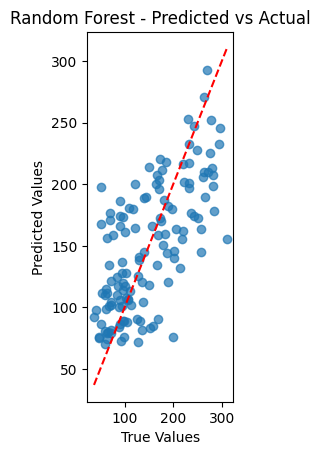

In [12]:
# Plot 1: Predicted vs Actual
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"{name} - Predicted vs Actual")

Text(0.5, 1.0, 'Random Forest - Residual Plot')

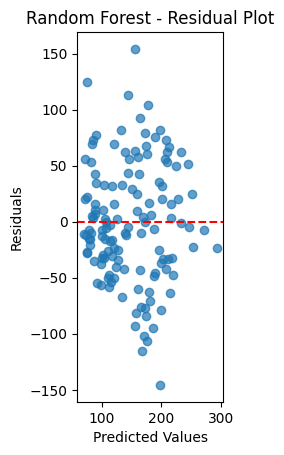

In [15]:
# Plot 2: Residuals Plot
plt.subplot(1,3,2)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title(f"{name} - Residual Plot")


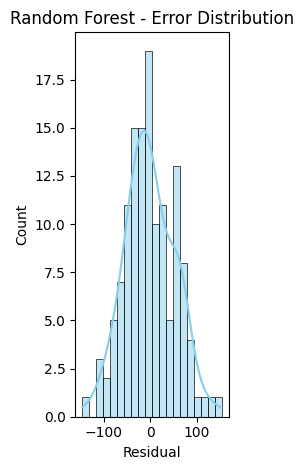

In [17]:
# Plot 3: Error Distribution
plt.subplot(1,3,3)
sns.histplot(residuals, kde=True, bins=20, color="skyblue")
plt.xlabel("Residual")
plt.title(f"{name} - Error Distribution")

plt.tight_layout()
plt.show()






# 📖 Academic Interpretation of Results

---

## 1. Metrics Comparison  

The models were benchmarked using multiple **regression metrics**:  

### Mean Absolute Error (MAE)  

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$  

- Measures average magnitude of prediction errors (ignores direction).  
- **Results**:  
  - Linear Regression ≈ **41.9**  
  - Random Forest ≈ **42.2**  
- Interpretation → Both are close, showing similar error magnitude.  

---

### Mean Squared Error (MSE)  

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$  

- Penalizes larger errors more strongly.  
- **Results**:  
  - Random Forest: **2805**  
  - Linear Regression: **2821**  
- Interpretation → Random Forest slightly outperforms, handling variance better.  

---

### Root Mean Squared Error (RMSE)  

$$
RMSE = \sqrt{MSE}
$$  

- Preserves units of the target (interpretable as “average error size”).  
- **Results**: ≈ **53** for both models → consistent with MAE.  

---

### Mean Absolute Percentage Error (MAPE)  

$$
MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$  

- Reflects percentage-based accuracy.  
- **Results**: ≈ **36–37%**  
- Interpretation → Acceptable accuracy, though deviations remain significant.  

---

### $R^2$ (Coefficient of Determination)  

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$  

- Explains variance captured by the model.  
- **Results**: ≈ **0.47–0.48**  
- Interpretation → Moderate predictive power.  
- Adjusted $R^2$ and Explained Variance confirm similar findings, with Random Forest slightly better at generalization.  

---

## 2. Visual Diagnostics  

### a. Predicted vs. Actual Plot  
- Perfect predictions → lie on diagonal.  
- Scatter shows **moderate spread**.  
- Random Forest predictions align better, though variance increases at higher values.  

### b. Residual Plot  

$$
e_i = y_i - \hat{y}_i
$$  

- Residuals scatter around zero.  
- Random Forest residuals: symmetric, but heteroscedasticity present (larger errors for higher predictions).  
- Interpretation → Low bias but variance grows with prediction magnitude.  

### c. Error Distribution  
- Histogram approximates normal distribution.  
- Slight skewness → model overestimates certain ranges.  
- Overall → balanced, validating regression assumptions.  

---

## 3. Implications  

- **Random Forest** marginally outperforms Linear Regression (better MSE, RMSE, variance explained).  
- **Linear Regression** remains competitive, simpler, and more interpretable.  
- Visual diagnostics reveal systematic variance issues → **feature engineering** or **boosting methods** may improve results.  

---

## ✅ Verdict  

This lab shows that **regression metrics and diagnostic plots provide complementary insights**:  

- **Scalar metrics** quantify error.  
- **Visual diagnostics** reveal patterns of variance, bias, and fidelity.  

➡️ Together, they enable **robust evaluation of regression models**, ensuring both statistical validity and practical interpretability.  
